In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('data.csv')
df['Label'] = df['ngay_mo_date'].notna().astype(int)
value_counts = df['sdt_mahoa'].value_counts()
values_appearing_more_than_once = value_counts[value_counts > 1]
values_appearing_more_than_once = values_appearing_more_than_once.index.tolist()

filtered_df = df[df['sdt_mahoa'].isin(values_appearing_more_than_once)]

filtered_df = df.drop_duplicates(subset=['sdt_mahoa'])

In [ ]:
threshold = 0.8
columns_to_check = ['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5','data_1', 'data_2', 'data_3', 'data_4','data_5','call_1', 'call_2', 'call_3', 'call_4','call_5']

total_columns = len(columns_to_check)
threshold_value = threshold * total_columns  

def missing_value_count(row):
    return row[columns_to_check].isnull().sum()

filtered_df['missing_count'] = filtered_df.apply(missing_value_count, axis=1)

rows_above_threshold = filtered_df[filtered_df['missing_count'] > threshold_value]

rows_below_threshold = filtered_df[filtered_df['missing_count'] <= threshold_value]

rows_above_threshold = rows_above_threshold.drop(columns=['missing_count'])
rows_below_threshold = rows_below_threshold.drop(columns=['missing_count'])

dropped_samples = rows_above_threshold

remaining_samples = rows_below_threshold


final_df=remaining_samples.copy()
to_divide=['apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5']
final_df[to_divide]=final_df[to_divide].div(1000)
max_value_tong_dai = final_df['ngay_goi_tong_dai_gan_nhat'].max()

final_df['ngay_goi_tong_dai_gan_nhat'].fillna(max_value_tong_dai, inplace=True)

max_value_nap_tien = final_df['ngay_nap_tien_gan_nhat'].max()

final_df['ngay_nap_tien_gan_nhat'].fillna(max_value_nap_tien, inplace=True)

max_value_dang_ky_goi = final_df['ngay_dang_ky_goi_gan_nhat'].max()

final_df['ngay_dang_ky_goi_gan_nhat'].fillna(max_value_dang_ky_goi, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15632\890224206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['missing_count'] = filtered_df.apply(missing_value_count, axis=1)


In [ ]:
import pandas as pd

columns_to_cap = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_cleaned = final_df.copy()

for col in columns_to_cap:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # # Define lower and upper bounds using percentiles
    # lower_bound = df_capped[col].quantile(0.01)  # 1st percentile
    # upper_bound = df_capped[col].quantile(0.99)  # 99th percentile

    df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

In [ ]:
import pandas as pd
columns_to_fill = [
    'apru_1', 'apru_2', 'apru_3', 'apru_4', 'apru_5',
    'data_1', 'data_2', 'data_3', 'data_4','data_5',
    'call_1', 'call_2', 'call_3', 'call_4','call_5'
]

df_filled = df_cleaned.copy()

for col in columns_to_fill:
    median_value = df_filled[col].median()  
    df_filled[col].fillna(median_value, inplace=True)  

In [6]:
df_encoded = pd.get_dummies(df_filled, columns=['da_tung_dang_ky_goi'], drop_first=True)

In [43]:
data=df_encoded.drop(columns=['sdt_mahoa','ngay_khoa','ngay_mo_date','ngay_mo_khoa','danh_sach_goi_dang_ky','ngay_nap_tien_gan_nhat','ngay_goi_tong_dai_gan_nhat','ngay_dang_ky_goi_gan_nhat'])

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,  roc_auc_score, confusion_matrix
from sklearn.pipeline import make_pipeline


In [ ]:
X = data.drop('Label', axis=1)  # Features
y = data['Label']  # Target label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# # Scale the data
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# Initialize the Random Forest model
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

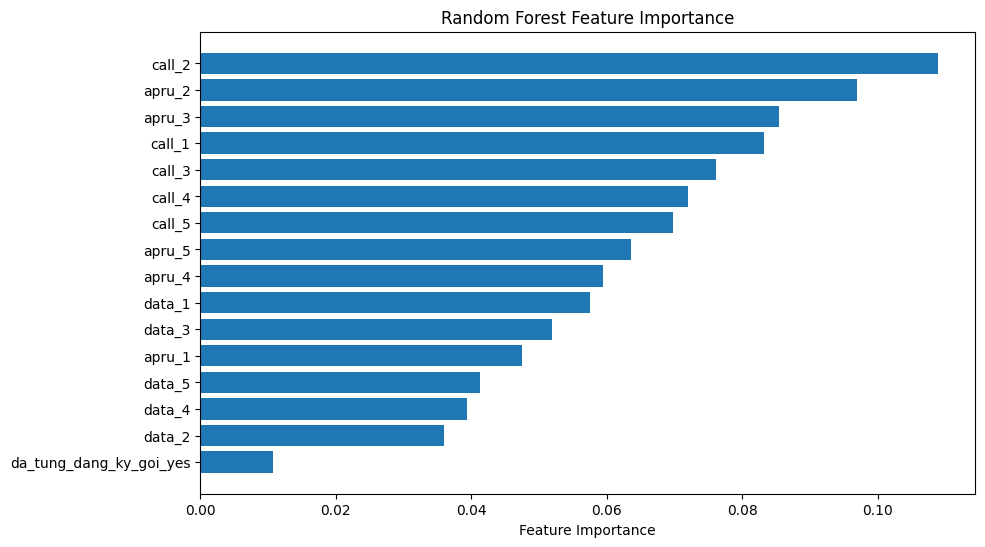

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rf_feature_importance = rf_model.feature_importances_

feature_names = X_train.columns 
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis() 
plt.show()


In [ ]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}\n")

evaluate_model('Random Forest', y_test, rf_predictions)

Evaluation Metrics for Random Forest:
Accuracy: 0.7934
Precision: 0.8032
Recall: 0.8786
F1-Score: 0.8392
ROC-AUC: 0.7684
Confusion Matrix:
[[25238 13111]
 [ 7392 53517]]



In [ ]:
misclassified_indices = (y_test == 1) & (rf_predictions == 0)

misclassified_users = X_test[misclassified_indices]


In [ ]:
misclassified_users = X_test[misclassified_indices].copy()

misclassified_users['True_Label'] = y_test[misclassified_indices]
misclassified_users['Predicted_Label'] = rf_predictions[misclassified_indices]

In [50]:
misclassified_users

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,da_tung_dang_ky_goi_yes,True_Label,Predicted_Label
186567,31.50005,78.499990,10.0000,86.17949,67.152300,2.0,0.0,3.0,7.0,9.0,0.000000,0.000000,0.000000,0.000232,0.133295,True,1,0
152202,0.00000,0.000000,0.0000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0
304542,0.00000,5.000000,62.9025,15.98500,63.606500,0.0,0.0,12.0,26.0,43.0,0.000000,0.000000,0.000230,0.000000,0.000000,False,1,0
61019,120.00010,0.000000,0.4107,14.19060,89.999000,21.0,0.0,1.0,1.0,5.0,0.035445,0.000000,0.000000,0.513825,7.953162,False,1,0
307831,83.99930,83.999795,99.4499,89.64890,34.999800,3.0,4.0,12.0,3.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76549,0.00000,2.133000,1.0290,13.92350,0.898200,31.0,24.0,25.0,62.0,18.0,0.000044,0.034025,1.420696,6.172211,1.620806,False,1,0
293965,0.00000,89.263900,110.6919,120.64030,124.166667,13.0,11.0,30.0,42.0,54.0,0.000000,0.000035,0.292847,0.718382,1.054648,True,1,0
109440,120.00010,2.024000,24.1170,54.50700,0.000000,21.0,7.0,30.0,13.0,0.0,0.035445,0.000000,0.000000,0.000000,0.000000,True,1,0
77060,0.00000,0.646200,0.4840,1.47790,2.460800,0.0,0.0,4.0,2.0,2.0,0.000000,0.000070,0.000095,0.000135,0.000095,False,1,0


In [ ]:
merged_df = df.loc[misclassified_users.index].join(misclassified_users[['True_Label', 'Predicted_Label']])

print("Merged DataFrame (Misclassified Users with Original Data):")
display(merged_df)


Merged DataFrame (Misclassified Users with Original Data):


,sdt_mahoa,ngay_khoa,ngay_mo_date,ngay_mo_khoa,ngay_nap_tien_gan_nhat,apru_1,apru_2,apru_3,apru_4,apru_5,...,data_3,data_4,data_5,ngay_goi_tong_dai_gan_nhat,da_tung_dang_ky_goi,ngay_dang_ky_goi_gan_nhat,danh_sach_goi_dang_ky,Label,True_Label,Predicted_Label
186567,30d06d9c11b9c3cb1f6de51cf57897071ee180be,9/9/2021,9/10/2021,1.0,NaN,31500.05,78499.990,10000.0,86179.49,67152.3,...,0.000000,0.000232,0.133295,NaN,yes,234.0,MI_BIG_60G_2GBN,1,1,0
152202,1cc0d5a56e4d75907ca056220dda04431b881a9a,9/4/2021,9/5/2021,1.0,NaN,0.00,0.000,0.0,0.00,0.0,...,0.000000,0.000000,0.000000,NaN,yes,491.0,MI_BIGKM_2GBN,1,1,0
304542,bc974bd7974d0b1b495ea430d4c347fd3bb0cb3b,9/10/2021,9/17/2021,7.0,NaN,0.00,5000.000,62902.5,15985.00,63606.5,...,0.000230,0.000000,0.000000,NaN,no,NaN,NaN,1,1,0
61019,b4c8c2ba554bd3991491f4a6b47efb8e01fb089e,9/3/2021,9/10/2021,7.0,NaN,NaN,0.000,410.7,14190.60,89999.0,...,0.000000,0.513825,7.953162,NaN,no,NaN,NaN,1,1,0
307831,c27c8ec3ee57c82cc4ca7747f95248083e77041b,9/25/2021,9/28/2021,3.0,NaN,83999.30,83999.795,99449.9,89648.90,34999.8,...,0.000000,0.000000,0.000000,NaN,yes,1182.0,GD0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76549,050c7950f94e4ff69a87c23b0d233997d031ef0a,9/10/2021,9/12/2021,2.0,1.0,0.00,2133.000,1029.0,13923.50,898.2,...,1.420696,6.172211,1.620806,NaN,no,NaN,NaN,1,1,0
293965,0e457f67377be208f90113f1130e4114267f357d,9/13/2021,9/24/2021,11.0,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,19.0,"FHAPPY,MI_BIGFD_2GBN",1,1,0
109440,c1dbd5f5f0a53b6aac2c6320e6b4e9e4a3b2b0ff,9/30/2021,10/11/2021,11.0,NaN,NaN,2024.000,24117.0,54507.00,0.0,...,0.000000,0.000000,0.000000,NaN,yes,71.0,"MED_V1,MED_V2",1,1,0
77060,3c22627e6c860ef38f35edf0a7841fdb7d407c9a,9/30/2021,10/11/2021,11.0,NaN,0.00,646.200,484.0,1477.90,2460.8,...,0.000095,0.000135,0.000095,NaN,no,NaN,NaN,1,1,0


In [ ]:
misclassified_features = X_test.loc[misclassified_users.index]
misclassified_importance = misclassified_features * rf_feature_importance

mean_importance_misclassified = misclassified_importance.mean(axis=0)

misclassified_importance_df = pd.DataFrame({
    'Feature': misclassified_features.columns,
    'Mean Importance for Misclassified': mean_importance_misclassified
}).sort_values(by='Mean Importance for Misclassified', ascending=False)

print("Feature Importance for Misclassified Users:")
display(misclassified_importance_df)


Feature Importance for Misclassified Users:


,Feature,Mean Importance for Misclassified
apru_3,apru_3,5.752866
apru_5,apru_5,5.012957
apru_4,apru_4,4.288555
apru_2,apru_2,3.397254
apru_1,apru_1,3.030680
call_5,call_5,2.010352
call_4,call_4,1.512716
call_3,call_3,1.132586
call_1,call_1,0.672892
call_2,call_2,0.555461


In [ ]:
comparison_df = rf_importance_df.merge(
    misclassified_importance_df,
    on='Feature',
    how='left',
    suffixes=('_Overall', '_Misclassified')
)

print("Comparison of Feature Importance (Overall vs. Misclassified):")
display(comparison_df)


Comparison of Feature Importance (Overall vs. Misclassified):


,Feature,Importance,Mean Importance for Misclassified
0,call_2,0.108938,0.555461
1,apru_2,0.096997,3.397254
2,apru_3,0.085354,5.752866
3,call_1,0.083254,0.672892
4,call_3,0.076128,1.132586
5,call_4,0.072044,1.512716
6,call_5,0.069791,2.010352
7,apru_5,0.063589,5.012957
8,apru_4,0.059402,4.288555
9,data_1,0.057568,0.025467


In [41]:
df['ngay_dang_ky_goi_gan_nhat'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 336887 entries, 0 to 336886
Series name: ngay_dang_ky_goi_gan_nhat
Non-Null Count   Dtype  
--------------   -----  
195690 non-null  float64
dtypes: float64(1)
memory usage: 2.6 MB


In [42]:
df['ngay_dang_ky_goi_gan_nhat'].describe()

count    195690.000000
mean        323.893418
std         307.105801
min           1.000000
25%          92.000000
50%         211.000000
75%         469.000000
max        6862.000000
Name: ngay_dang_ky_goi_gan_nhat, dtype: float64

In [ ]:
df['ngay_dang_ky_goi_gan_nhat'].describe()

In [54]:
misclassified_users.describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,True_Label,Predicted_Label
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.0,7392.0
mean,63.730623,35.024495,67.400450,72.196045,78.834030,8.082386,5.098891,14.877435,20.997159,28.805195,0.442391,0.614050,1.256952,1.707202,2.131731,1.0,0.0
std,75.405386,59.683011,67.559787,71.408508,72.865780,14.770956,16.089076,24.435123,34.659638,43.384362,2.031840,2.042155,3.564032,4.269219,4.746443,0.0,0.0
min,-0.100000,0.000000,-0.000400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
25%,0.000000,0.000000,1.098075,1.098125,4.980050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0
50%,41.666667,0.596400,52.249050,59.333333,85.847550,1.000000,0.000000,4.000000,6.000000,10.000000,0.000006,0.000000,0.006858,0.044897,1.020954,1.0,0.0
75%,120.000100,49.999325,110.691900,120.640300,124.166667,21.000000,4.000000,30.000000,42.000000,54.000000,0.035445,0.000226,0.292847,0.718382,1.054648,1.0,0.0
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,1.0,0.0


In [55]:
data[data['Label']==1].describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,Label
count,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.000000,203367.0
mean,151.154810,133.201212,143.119691,150.020032,152.713205,64.567206,70.208925,80.827155,93.456539,112.663726,3.491797,3.036764,4.290278,4.937009,5.324752,1.0
std,111.596665,107.656620,103.285339,101.105755,104.210524,70.746155,73.205752,86.552415,95.517918,114.133078,4.880310,3.820326,5.800268,6.672608,7.112233,0.0
min,-0.100000,0.000000,-9.000000,-0.000500,-0.000750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,90.349800,44.999999,83.999300,90.290200,90.399100,9.000000,3.000000,8.000000,18.000000,22.000000,0.000000,0.000000,0.000000,0.000004,0.000001,1.0
50%,130.984700,126.346395,129.699900,130.742304,131.448900,31.000000,43.000000,46.000000,54.000000,67.000000,0.265479,0.509839,0.783159,0.948205,1.124634,1.0
75%,188.999800,178.519313,188.999800,190.941850,195.352300,103.000000,124.000000,129.000000,143.000000,171.000000,6.285509,6.748521,7.290153,7.938386,8.465981,1.0
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,1.0


In [56]:
data[data['Label']==0].describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,Label
count,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,127490.000000,1.274900e+05,127490.000000,127490.0
mean,95.598085,47.768728,92.637602,100.101944,105.984022,19.569809,15.036383,29.346796,38.120504,49.080053,0.948283,0.960868,1.632141,2.130056e+00,2.486917,0.0
std,87.576998,81.814539,75.746462,76.148484,76.171087,33.032534,38.277349,44.183586,50.611572,60.866071,2.943752,2.545755,3.962532,4.632229e+00,4.959569,0.0
min,-0.100000,-0.000500,-0.000500,-0.000500,-0.000550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0
25%,0.000000,0.000000,24.500300,41.666667,48.999500,0.000000,0.000000,1.000000,2.000000,4.000000,0.000000,0.000000,0.000000,2.145000e-07,0.000030,0.0
50%,120.000100,0.000000,110.691900,120.640300,124.166667,21.000000,0.000000,30.000000,42.000000,54.000000,0.035445,0.000000,0.292847,7.183825e-01,1.054648,0.0
75%,120.000100,88.999900,110.691900,120.640300,124.166667,21.000000,9.000000,30.000000,42.000000,54.000000,0.035445,0.000489,0.292847,7.183825e-01,1.054648,0.0
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,1.896897e+01,20.884153,0.0


Falso pos

In [ ]:
misclassified_indices = (y_test == 0) & (rf_predictions == 1)

misclassified_users = X_test[misclassified_indices]


In [ ]:
misclassified_users = X_test[misclassified_indices].copy()

misclassified_users['True_Label'] = y_test[misclassified_indices]
misclassified_users['Predicted_Label'] = rf_predictions[misclassified_indices]

In [ ]:
merged_df = df.loc[misclassified_users.index].join(misclassified_users[['True_Label', 'Predicted_Label']])

print("Merged DataFrame (Misclassified Users with Original Data):")
display(merged_df)


Merged DataFrame (Misclassified Users with Original Data):


,sdt_mahoa,ngay_khoa,ngay_mo_date,ngay_mo_khoa,ngay_nap_tien_gan_nhat,apru_1,apru_2,apru_3,apru_4,apru_5,...,data_3,data_4,data_5,ngay_goi_tong_dai_gan_nhat,da_tung_dang_ky_goi,ngay_dang_ky_goi_gan_nhat,danh_sach_goi_dang_ky,Label,True_Label,Predicted_Label
77649,995a52c1432f1f1acf6a6f4625139f4c975062b9,9/21/2021,NaN,NaN,NaN,119728.4000,138049.3950,139856.2000,198822.8000,193888.2000,...,0.000194,0.000032,0.000033,8.0,no,NaN,NaN,0,0,1
291624,f02654d67cdd1c37e30c9b260a4a3a7b77460c47,9/3/2021,NaN,NaN,NaN,102475.1333,101083.3333,128133.3333,126833.3333,119133.3333,...,44.726905,34.827862,18.214535,NaN,yes,30.0,"VD149,MED_DH2,MI_D5,MI_BIGKM_4GBN",0,0,1
194294,026594f88502125544cd8194ecca13170e8fc58c,9/26/2021,NaN,NaN,NaN,93943.3000,95335.9000,93415.3000,96966.1000,92253.7000,...,0.959405,1.133382,3.436822,NaN,yes,117.0,MI_BIGKM_2GBN,0,0,1
158608,d47e42b86371b0d5ae092c4c639c486cd2316ca1,9/28/2021,NaN,NaN,NaN,0.0000,0.0000,180000.0026,255000.0046,254999.8000,...,13.101421,51.294061,62.548427,NaN,yes,134.0,"MB_BIGCD_30GB,MI_D15",0,0,1
227991,3d03fa992c209666fc8aac8965eee5b7f17fc5f2,9/26/2021,NaN,NaN,NaN,110105.6000,138091.9030,238236.9110,336564.9100,166750.1000,...,19.504252,50.996437,11.932659,NaN,yes,69.0,"KM_DATAM_1GB,MI_BIGKM_2GBN,MI_D5",0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275104,e5b8b1dbb29328d2c83ea4eca145db9ae7fae8df,9/27/2021,NaN,NaN,NaN,124259.3000,129318.2960,129350.1000,127329.4000,129350.1000,...,0.000000,0.000001,28.291211,NaN,yes,198.0,MI_MAX100N,0,0,1
220688,9b81fee082d4264907ac531c46f91a6607f11923,9/21/2021,NaN,NaN,NaN,149350.3000,149954.5000,149000.5000,149905.8000,74850.0500,...,30.510306,30.962641,1.011621,NaN,yes,156.0,MI_BIGKM_4GBN,0,0,1
146626,43e029e85b0ab983d8c7803f4ba881019eca1da1,9/14/2021,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.000000,NaN,no,NaN,NaN,0,0,1
219659,5e73782403290c216a09f1a9e680bd869f8e26a8,9/27/2021,NaN,NaN,NaN,106768.2000,149885.1000,206809.9000,136386.8000,144272.7000,...,7.465218,5.714801,5.142697,4.0,yes,57.0,"DE_BASIC,MI_MAXKM_7GB",0,0,1


In [ ]:
comparison_df = rf_importance_df.merge(
    misclassified_importance_df,
    on='Feature',
    how='left',
    suffixes=('_Overall', '_Misclassified')
)

print("Comparison of Feature Importance (Overall vs. Misclassified):")
display(comparison_df)


Comparison of Feature Importance (Overall vs. Misclassified):


,Feature,Importance,Mean Importance for Misclassified
0,call_2,0.108938,0.555461
1,apru_2,0.096997,3.397254
2,apru_3,0.085354,5.752866
3,call_1,0.083254,0.672892
4,call_3,0.076128,1.132586
5,call_4,0.072044,1.512716
6,call_5,0.069791,2.010352
7,apru_5,0.063589,5.012957
8,apru_4,0.059402,4.288555
9,data_1,0.057568,0.025467


In [61]:
misclassified_users.describe()

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,True_Label,Predicted_Label
count,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.000000,13111.0,13111.0
mean,129.889933,107.457254,117.424454,127.030028,131.353989,34.378079,39.204675,47.178324,56.942072,69.836016,2.402333,2.192277,3.262895,3.896791,4.226378,0.0,1.0
std,110.063371,103.163660,100.704413,96.845431,97.705338,49.967224,56.111289,67.299329,74.918784,89.193053,4.342472,3.510193,5.392719,6.299366,6.745190,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,-0.000550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,57.244550,0.292000,41.655950,54.168800,66.104250,2.000000,0.000000,2.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
50%,120.000100,90.954000,101.999700,120.640300,124.166667,20.000000,13.000000,20.000000,34.000000,48.000000,0.035445,0.000178,0.077840,0.718382,1.054648,0.0,1.0
75%,157.801050,152.089900,157.000800,159.001150,159.918000,39.000000,53.000000,60.000000,70.000000,85.000000,2.312270,3.287449,4.291317,5.124047,5.369447,0.0,1.0
max,443.170887,384.426250,376.165625,386.806900,396.500500,211.000000,202.500000,266.000000,310.500000,379.000000,12.767679,9.369862,15.903491,18.968971,20.884153,0.0,1.0


In [64]:
misclassified_users

,apru_1,apru_2,apru_3,apru_4,apru_5,call_1,call_2,call_3,call_4,call_5,data_1,data_2,data_3,data_4,data_5,da_tung_dang_ky_goi_yes,True_Label,Predicted_Label
77649,119.728400,138.049395,139.856200,198.822800,193.888200,10.0,22.0,55.0,88.0,121.0,0.000017,0.000036,0.000194,0.000032,0.000033,False,0,1
291624,102.475133,101.083333,128.133333,126.833333,119.133333,4.0,84.0,129.0,189.0,379.0,1.939377,9.369862,15.903491,18.968971,18.214535,True,0,1
194294,93.943300,95.335900,93.415300,96.966100,92.253700,26.0,35.0,34.0,55.0,38.0,0.676690,1.155872,0.959405,1.133382,3.436822,True,0,1
158608,0.000000,0.000000,180.000003,255.000005,254.999800,1.0,0.0,0.0,1.0,0.0,11.963679,0.000000,13.101421,18.968971,20.884153,True,0,1
227991,110.105600,138.091903,238.236911,336.564910,166.750100,211.0,202.5,266.0,310.5,379.0,12.767679,9.369862,15.903491,18.968971,11.932659,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275104,124.259300,129.318296,129.350100,127.329400,129.350100,7.0,29.0,58.0,23.0,41.0,0.000000,0.000000,0.000000,0.000001,20.884153,True,0,1
220688,149.350300,149.954500,149.000500,149.905800,74.850050,7.0,15.0,1.0,14.0,1.0,1.852527,9.369862,15.903491,18.968971,1.011621,True,0,1
146626,120.000100,0.000000,0.000000,0.000000,0.000000,21.0,0.0,0.0,0.0,1.0,0.035445,0.000000,0.000000,0.000000,0.000000,False,0,1
219659,106.768200,149.885100,206.809900,136.386800,144.272700,17.0,71.0,210.0,220.0,172.0,2.387796,5.688611,7.465218,5.714801,5.142697,True,0,1
